<h1 align="center">Lab 12: Introduction to Allen Mouse Brain Atlas Tools</h1>
<h3 align="center">Estimated Duration: 30 mins</h3>

## Introduction

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    In the first part of the lab, we used the Mouse Connectivity Atlas to analyze projection data within regions of the brain. In this part of the lab, we will instead use the Mouse Brain Atlas to explore the gene expression density within specific regions and entire structure of the brain

</center></p>. </div>

## Pre-lab: Importing Data

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Similar to the first part of the lab, we will be importing an Allen atlas. The cell below downlaods all Mouse Brain experiments, expression density, and griddata that we'll be using to analyze gene expression. 

</div>

In [7]:
# Run this cell
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi

%matplotlib inline 
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from allensdk.api.queries.mouse_atlas_api import MouseAtlasApi
from allensdk.core import sitk_utilities
from allensdk.api.cache import Cache, cacheable

from allensdk.api.queries.reference_space_api import ReferenceSpaceApi
from allensdk.api.queries.grid_data_api import GridDataApi
from allensdk.api.queries.rma_pager import pageable

# Creates variables to access the API with.
mcc = MouseConnectivityCache()
structure_tree = mcc.get_structure_tree()
maa = MouseAtlasApi()

In [34]:
geneData = maa.get_section_data_sets([35268], [])
print(list(geneData))

['l', 'i', 'n', 'e', ' ', '1', ',', ' ', 'c', 'o', 'l', 'u', 'm', 'n', ' ', '5', '0', ':', ' ', 'n', 'o', ' ', 'v', 'i', 'a', 'b', 'l', 'e', ' ', 'a', 'l', 't', 'e', 'r', 'n', 'a', 't', 'i', 'v', 'e', ' ', 'a', 't', ' ', 'i', 'n', 'p', 'u', 't', ' ', '"', ']', '"', '\n', 'm', 'o', 'd', 'e', 'l', ':', ':', 'S', 'e', 'c', 't', 'i', 'o', 'n', 'D', 'a', 't', 'a', 'S', 'e', 't', ',', 'r', 'm', 'a', ':', ':', 'c', 'r', 'i', 't', 'e', 'r', 'i', 'a', ',', 'p', 'r', 'o', 'd', 'u', 'c', 't', 's', '[', 'i', 'd', '$', 'i', 'n', ']', ',', 'g', 'e', 'n', 'e', 's', '[', 'i', 'd', '$', 'i', 'n', '3', '5', '2', '6', '8', ']', ',', 'r', 'm', 'a', ':', ':', 'i', 'n', 'c', 'l', 'u', 'd', 'e', ',', 'g', 'e', 'n', 'e', 's', ',', 'r', 'm', 'a', ':', ':', 'o', 'p', 't', 'i', 'o', 'n', 's', '[', 'n', 'u', 'm', '_', 'r', 'o', 'w', 's', '$', 'e', 'q', '2', '0', '0', '0', ']', '[', 's', 't', 'a', 'r', 't', '_', 'r', 'o', 'w', '$', 'e', 'q', '0', ']', '[', 'o', 'r', 'd', 'e', 'r', '$', 'e', 'q', "'", 'i', 'd', "'"

## Part 1: Gene Expression Within Brain Regions

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In this section, we will begin to explore the relationship between the expression tendencies of specific genes and the location(s) with which they're found in.

</div>

## Part 1.1: Selecting a gene

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In order to select a gene you wish to focus on, we need the gene id. We'll be using the **get_genes** function in the Mouse Atlas API (a collection of functions that extract data). This function takes in two **optional** values: 

    * organism_ids : a list of organism id's that we'll take experiments from. Defaults to mouse id's
    * chromosome_ids : a list of chromosome id's that we'll take experiments from. Defaults to all
    
This function will give us a list of experiments, genes, and their corresponding data, which we will use to get the id from.

In the code below, insert any specifics (if any) within the parantheses of **get_genes**. A list is represented with [] with commas between each value. Then, insert the gene you wish to study in the quotations below. In this example, we use the K-2 gene. Lastly, run the code to obtain the gene id for your gene.

</div>

In [15]:
# insert your structure id in below
experiments = mcc.get_experiments(injection_structure_ids=[502]) 

# The line below converts our infomration into a DataFrame 
data = pd.DataFrame(experiments)
data.head()

,gender,id,injection_structures,injection_volume,injection_x,injection_y,injection_z,primary_injection_structure,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id
0,F,527712447,"[502, 926, 1084, 484682470]",0.006655,9240,3070,8990,502,5,Penk-IRES2-Cre-neo-249961,C57BL/6J,SUB,502,Subiculum,Penk-IRES2-Cre-neo,298725927.0
1,M,506426778,"[502, 918, 926, 312782628]",0.324160,9500,4320,9420,502,5,Gpr26-Cre_KO250-206293,None,SUB,502,Subiculum,Gpr26-Cre_KO250,177839285.0
2,M,550155867,"[502, 726, 843, 926, 1084]",0.203537,9280,4410,8940,502,5,Slc17a6-IRES-Cre-261141,None,SUB,502,Subiculum,Slc17a6-IRES-Cre,177838048.0
3,M,126523791,"[215, 294, 502, 628, 706, 886, 1061, 484682470]",0.359012,7960,2400,6420,215,5,378-1282,C57BL/6J,SUB,502,Subiculum,None,NaN
4,F,556343427,"[502, 726, 918, 926, 1084, 484682470]",0.349502,9510,4270,9450,502,5,Slc17a6-IRES-Cre-272451,None,SUB,502,Subiculum,Slc17a6-IRES-Cre,177838048.0


In [17]:
# Isolates the wildtype experiments
experiment_set = [exp['id'] for exp in experiments if exp['transgenic_line'] == None]

# Places experiments in drop-down widget
wild_type = widgets.Dropdown(options = experiment_set, description = 'Wildtype Exp')
wild_type

Dropdown(description='Wildtype Exp', options=(126523791, 640285199, 127222723, 152994878, 127795906), value=12…

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Next, we're going to choose one of these experiments and assign it to our variable **chosen_exp** so we could easily call upon it later on! Write down the experiment id from above on the designated spot below.
</div>

In [18]:
# My chosen experiment 
chosen_exp = 152994878

## Part 1.2: Choosing a brain region 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
For this section, our main focus lies on isolating specific regions of the brain. To accomplish this task, we need to further refine our previous search results to only showcase the experiments that contain our specified gene and a specified brain region. 

This can be done through the use of the function **FUNCTION**, which will take in parameters: 

**FUNCTION** will check each experiment's affected region with your specified brain region to display experiment IDs which include both. In the code below, replace the quotations with a specified brain region to return a list of experiments for your specified brain region and gene. In this example, we used "Cerebrum."

</div>

In [28]:
# Replace "..." with a brain region. 
cerebrum = structure_tree.get_structures_by_name(["Cerebrum"])
cerebrum

[{'acronym': 'CH',
  'graph_id': 1,
  'graph_order': 2,
  'id': 567,
  'name': 'Cerebrum',
  'structure_id_path': [997, 8, 567],
  'structure_set_ids': [112905828,
   691663206,
   12,
   184527634,
   112905813,
   114512891,
   114512892],
  'rgb_triplet': [176, 240, 255]}]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Something that we will need for later is the structure id assigned by Allen Brain Atlas to each structure in the brain. You can obtain it by running the cell below. ( We obtain it by isolating the dictionary in the list from the previous cell and grabbing ' id ' )

<div/>

In [33]:
# Run this cell
cerebrum_id = cerebrum[0]['id']
print(cerebrum_id)

567


## Part 1.3 : Calculating gene expression density

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Now that we have found the list of experiment IDs which show our desired gene and region, we can find its frequency and thus its percentage of the all gene expression within that region. 

To begin, we introduce the idea of a for loop. This statement will go through our list of experiments one by one and run the indexed code below it each time. In the code below, we created a function to return the sum of the values in listOfNumbers. In order to obtain the values in listOfNumbers, we use a for loop where number is a variable we named that takes on the values in listOfNumbers. Note: number could be anything that starts with a letter - cake, shoe, s, do12g3.

In its first run through, number is set to num1 and added to our variable sum, which stores the current sum as we're going through the list. In its second run through, number is set to num2 and added to our variable sum, which is equal to num1. This for loop keeps running until all values in listOfNumbers have been accessed.

We will be writing a for loop to calculate your specified gene expression density, so it is important to understand how a for loop works before moving on.

</div>

In [38]:
def sums(num1, num2) :
    listOfNumbers = [num1, num2, 12314, 32534, 13513]
    sum = 0
    for number in listOfNumbers: 
        sum = sum + number 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
To calculate density, we will create a function called **percentage**. This function will take in one value: 

     * gene_id : the id that corresponds to the gene you wish to explore 

**Percentage** will display percent that your gene appears relative to all genes in your specified brain region. To calculate proportion, we use the total amount of times the gene appears in the brain over the total amount of gene expression in that region and multiply this value by 100 to get the percent. 

To store the number of times we see our gene_id, we'll create a variable called occurrences, which is initially set to 0. Within our for loop, we will be taking the gene expression id in each experiment and comparing it to our gene_id. If they're equal, we will increment occurrences. 

In the code block below, fill in the appropriate values within the for loop to calculate percent. See below for hints.

</div>

In [39]:
def percentage(gene_id) :
    occurrences = 0
    length = 0
    for ___ in ____ : 
        if (___ == gene_id) :
            occurrences = _________
        length = length + 1
    return occurrences / length * 100

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

**Hints** :

The two blanks after for refer to the following: 

     * first blank refers to a variable that can take on any name starting with a letter. It takes on each value in a list one by one. 
     * second blank refers to a list of some kind that we want to access the values of in order to calculate percentage. This is something we've found earlier in this lab. 

</div>

## Part 1.4: Most common gene expressions 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
To ensure you are on the right track, below is a bar graph indicating the ten most expressed genes in the your specified region of the brain. Fill in your specified brain region within quotations below. We used Cerebrum in our example. Then, run the code below to construct a bar graph showing data relevant to your brain region.

</div>

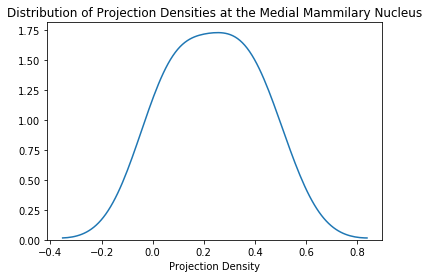

In [64]:
# Replace Cerebrum with your specified brain region. 

## Part 2: Gene Expression overall within BIG brain

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Let's calculate the **mean** of the projection densities at the medial mammillary nucleus.
</div>

In [65]:
sub_mean = sum(proj_dens) / len(proj_dens)
sub_mean

0.23557054765769622

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Find the **median** of the projection densities at the medial mammillary nucleus.
</div>

In [66]:
sub_median = medial_mammillary.sort_values('projection_density', ascending=False)['projection_density'].values[2]
sub_median

0.24814843696811198

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Now find the **standard deviation** of the projection densities at the medial mammillary nucleus.

Recall:

$$\sigma = \sqrt{\sum_{i=1}^N \frac{(x-\mu)^2}{N - 1}}$$

* $\sigma$ = standard deviation
* $x$ = data
* $\mu$ = mean
* $N$ = number of values
</div>

In [67]:
sub_std = np.sqrt(sum((proj_dens - sub_mean)**2) / (len(proj_dens) - 1))
sub_std

0.17050709841601444

## Part 2.4: Average Projection Densities

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Using our statistical analysis, we can observe the average projection densities at the top 20 sites where the subiculum maps to for the 5 wildtype injections.
</div>

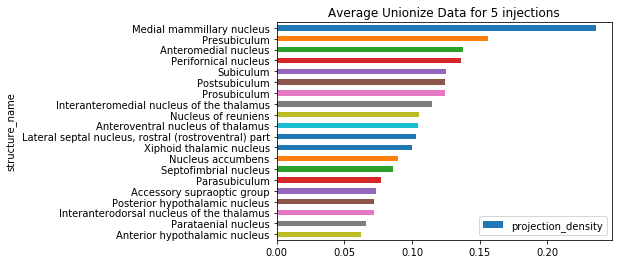

In [68]:
# Run this cell

# We can combine groupby and mean to find the average projection density across experiments for each summary structure
unionizes_set_mean = (unionizes_set.groupby('structure_id', as_index = False)['projection_density'].mean())

# Again, add a column with summary structure acronyms so we can interpret the unionizes more easily
names = [name_map[strid] for strid in unionizes_set_mean['structure_id']]
unionizes_set_mean['structure_name'] = names
unionizes_set_mean.sort_values(by = 'projection_density', ascending = False, inplace = True)

# Plot the 20 structures with the highest average projection density across all wild type Subiculum injections
unionizes_set_mean[:20].plot('structure_name', 'projection_density', kind='barh')
plt.gca().invert_yaxis()
plt.title('Average Unionize Data for %i injections'%len(experiment_set));

In [69]:
# look at the data
# re-generate means so they are in the same order as standard deviation
unionizes_set_mean = (
    unionizes_set.groupby('structure_id', as_index = False)[
    'projection_density'].mean())

# generate a second data frame with standard deviations
unionizes_set_std = (
    unionizes_set.groupby('structure_id', as_index = False)[
    'projection_density'].std())

# find names from structure ids
names = [name_map[strid] for strid in unionizes_set_mean['structure_id']]

# combine names, mean, and standard deviation into one dataframe for easy plotting
set_mean_std = pd.DataFrame({'structure_name': names, 
                            'mean_projection_density': unionizes_set_mean['projection_density'], 
                            'stdev':  unionizes_set_std['projection_density']
                            })

# sort the dataframe to get the top 20 values on top
set_mean_std.sort_values(by = 'mean_projection_density', ascending = False, inplace = True)

set_mean_std.head()

,structure_name,mean_projection_density,stdev
145,Medial mammillary nucleus,0.235571,0.170507
282,Presubiculum,0.156300,0.164140
35,Anteromedial nucleus,0.137534,0.125943
308,Perifornical nucleus,0.136466,0.101008
146,Subiculum,0.124839,0.083361


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Do your results match those in our visualization and the table above?
</div>

## Part 3: Bootstrap

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

For this part of the lab, we will apply a technique called boostraping to analyze the probability of a structure being a part of a circuit. We will start off with looking at the Primary Visual Cortex since it has more wildtype injections than the subiculum.
</div>

In [70]:
# Run this cell
VISp = structure_tree.get_structures_by_name(["Primary visual area"])
VISp_id = VISp[0]['id']
visual_experiments = mcc.get_experiments(injection_structure_ids=[VISp_id]) 
visual_experiment_set = [exp['id'] for exp in visual_experiments if exp['transgenic_line'] == None]
visual_data = pd.DataFrame(visual_experiment_set)
print('Total number of experiments in the Primary visual area:', len(visual_data))
print('Primary visual area id:', VISp_id)

Total number of experiments in the Primary visual area: 33
Primary visual area id: 385


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In the cell above, we obtain the structure id for the **Primary Visual Area** and filter the number of experiments to wildtype (transgenic line == None). This was the same procedure that was done in the subiculum but condensed into one cell. Try to follow along, but don't focus too much on the code. 

Next, we will obtain a **unionizes_set** similar to the one obtained for the subiculum. The unionizes set is a DataFrame that consists of all of the structures that the Primary visual area projects to for every injection. We named it visual_unionizes_set to differentiate between the earlier unionizes_set.
</div>

In [71]:
visual_unionizes_set = mcc.get_structure_unionizes(visual_experiment_set,
                                               is_injection = False,
                                                structure_ids = summary_structure_ids,
                                               hemisphere_ids = [3])
visual_names = [name_map[strid] for strid in visual_unionizes_set['structure_id']]
visual_unionizes_set['structure_name'] = visual_names
visual_unionizes_set.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume,structure_name
0,3,636132166,False,1.000000,9370,2500,9450,0.105844,0.129473,280.100383,2163.396424,0.070242,307297141,312782574,2.717960e+11,442877400.0,1.240501e+11,5.734045e+07,0.542525,Laterointermediate area
1,3,636130952,False,0.176642,3690,3470,6460,0.000097,0.000069,0.029395,424.604137,0.000064,307297141,44,1.842736e+11,759889792.0,2.233689e+07,5.260639e+04,0.930865,Infralimbic area
2,3,636131320,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,246,7.140429e+09,123998400.0,0.000000e+00,0.000000e+00,0.151898,"Midbrain reticular nucleus, retrorubral area"
3,3,636131638,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,460,5.506341e+08,8535600.0,0.000000e+00,0.000000e+00,0.010456,Midbrain trigeminal nucleus
4,3,636132128,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,599626923,4.878733e+08,13030200.0,0.000000e+00,0.000000e+00,0.015962,Subcommissural organ


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In the next cell, we want to obtain the projection densities for the different injections to the Primary visual area that project to the medial mammillary nucleus. We do this in the first line and we name it **mmn** to differentiate from the variable **medial_mammillary**. Next, we arrange the projection densities from biggest to smallest.
</div>

In [72]:
mmn = visual_unionizes_set[visual_unionizes_set['structure_name'] == 'Medial mammillary nucleus']
mmn = mmn['projection_density'].sort_values(ascending=False).values
mmn

array([3.53851879e-01, 5.54855498e-02, 6.99215228e-04, 1.87557598e-04,
       1.59921258e-04, 1.27419001e-04, 1.13553904e-04, 1.05397442e-04,
       8.50623343e-05, 7.62672564e-05, 6.96496052e-05, 5.50569880e-05,
       4.81055549e-05, 3.82561235e-05, 3.21326946e-05, 3.04819335e-05,
       2.96921059e-05, 2.64879792e-05, 1.21357127e-05, 9.85602408e-06,
       9.83749942e-06, 9.46315358e-06, 6.95636149e-06, 6.37881662e-06,
       5.13140928e-06, 2.05455434e-06, 1.48721138e-06, 1.32933310e-06,
       4.21888049e-07, 7.88465769e-08, 2.38114485e-08, 3.44629633e-09,
       0.00000000e+00])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Next, we are going to create a dataframe that we will be able to use for the bootstrapping. 
</div>

In [73]:
mmn_data = {'Medial mammillary nucleus': mmn}
mmn_dataframe = pd.DataFrame(data=mmn_data)
mmn_dataframe.head()

,Medial mammillary nucleus
0,0.353852
1,0.055486
2,0.000699
3,0.000188
4,0.000160


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
The essence of bootstrapping is reliant on a population. In this case, the population is going to be that of the neurons that project to the medial mammillary nucleus from the primary visual area. We obtained a sample, the 33 wildtype experiments from the primary visual area. 

In the cell below, we will resample the samples, which will give us an estimate of the real population distribution, and will give us a "confidence interval" for where the real mean of the population should be. We will do this 5000 times to make sure that our number is big enough for our data to be accurate.
</div>

In [74]:
# Run this cell
means = []
for i in np.arange(5000):
    resampled = mmn_dataframe.sample(n = 33, replace = True)
    mean = resampled.mean()
    means = np.append(means, mean)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We will now graph the resampled means in the histogram below. 
</div>

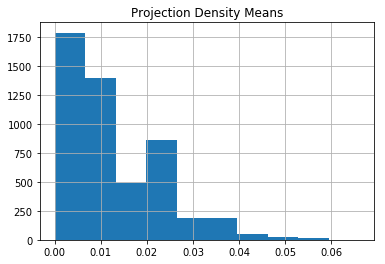

In [75]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Now, let's overlay the mean projection density from the subiculum to the medial mammillary nucleus with the historygram above.
</div>

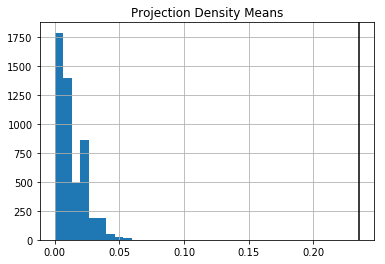

In [76]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()
plt.axvline(sub_mean, color = 'k')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
What can we see about the difference in projection density means to the medial mammillary nucleus from the primary visual area and the subiculum?
</div>

*Your answer here*

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
From the histogram above, it is obvious that the mean projection density from the subiculum and the one from the primary visual area do not come from the same underlying population distribution, due to the sharp contrast in numbers. Usually, this analysis would be done using p-values, (which will be included as optional exercises afterwards) but because the contrast is so big, we can skip this step. 

<h3 align="center">What does this mean in terms of connectivity?</h3>

It makes sense that the mean projection density from the subiculum to the medial mammillary nucleus be so high due to this being the connectivity in the Papez circuit. It also makes sense that the mean projection density is so low for the primary visual cortex, due to the fact that this structure is not part of the circuit (even though there is still minimal connectivity).

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
<h3 align="center">Optional Exercises</h3>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Below, we will use the function **quantile** to come up with the 95% interval. This interval says that the true mean of all projection densities from the primary visual area to the medial mammillary nucleus is likely to be between these two values.
</div>

In [77]:
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn)
percentile = list(mmn_means.quantile([0.025, 0.975])['Projection Density Means'])
percentile

[4.337306761375068e-05, 0.03558782991550174]

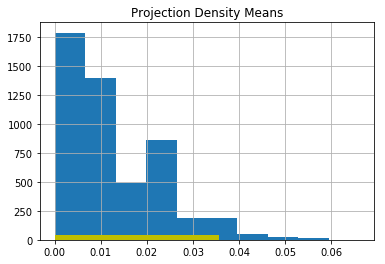

In [78]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()
plt.hlines(y=0, xmin=percentile[0], xmax=percentile[1], linewidth=10, color = 'y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Below, we will calculate the ***p-value*** using the above distribution and a made-up mean named **mystery_mean** that will simulate a mean projection density obtained from one of the injections into the primary visual area that projects to the medial mammillary nucleus. We must come up with a null hypothesis and an alternative hypothesis in oder to use the p-value.

***Null hypothesis:*** The mystery_mean comes from the same underlying distribution as that of the medial mammilary nucleus. 

***Alternative hypothesis:*** The mystery_mean does not come from the same underlying distribution, and any correlation is purely due to chance. 

</div>

In [79]:
# Run this cell
mystery_mean = 0.0434
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn)

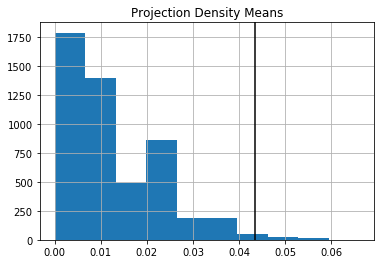

In [80]:
mmn_means.hist()
plt.axvline(mystery_mean, color = 'k')

In [81]:
p_value = np.average(mmn_means > mystery_mean)
p_value

0.013

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Since the p_value is less than 0.05 (chosen by convention), we can reject the null hypothesis. This means that our mystery_mean did not come from the same underlying distribution as the means from the primary visual area, so we can assume that our mystery_mean is not coming from the primary visual area.

</div>

## Conclusion

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We hoped that this lab served as a good introductions to the tools and the statistical analysis used in neuroinformatics. Neuroinformatics is a growing field and every year, new techniques are being invented for collection of large neural information. Because of this, it is important to know how to analyze and manipulate this data. 

If you liked the lab and would like to further your data science techniques, below are some introductary courses that may interest you:

***Data 8: The Foundations of Data Science***

***Data 100: Principles and Techniques of Data Science***

***Prob 140: Probability for Data Science***
</div>